In [42]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
ine_original = pd.read_csv('../archivos/2074.csv',encoding='latin1',sep="\t")
ine_original.head()

,ï»¿Totales Territoriales,Comunidades y Ciudades AutÃ³nomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total
0,Total Nacional,NaN,NaN,Viajero,Total,NaN,2023M09,11.635.208
1,Total Nacional,NaN,NaN,Viajero,Total,NaN,2023M08,13.196.928
2,Total Nacional,NaN,NaN,Viajero,Total,NaN,2023M07,12.664.627
3,Total Nacional,NaN,NaN,Viajero,Total,NaN,2023M06,11.507.055
4,Total Nacional,NaN,NaN,Viajero,Total,NaN,2023M05,10.645.074


In [3]:
ine_22= ine_original.copy()

In [4]:
# Creo un DataFrame con solo las filas correspondientes a 2022
ine_22 = ine_22[ine_22['Periodo'].str.contains('2022')]
ine_22.head()

,ï»¿Totales Territoriales,Comunidades y Ciudades AutÃ³nomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total
9,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M12,6.054.556
10,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M11,6.284.698
11,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M10,9.743.259
12,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M09,11.050.305
13,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M08,12.889.916


In [5]:
# Reinicio los índices para que estén en orden
ine_22.reset_index(drop=True, inplace=True)

In [6]:
ine_22.head()

,ï»¿Totales Territoriales,Comunidades y Ciudades AutÃ³nomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total
0,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M12,6.054.556
1,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M11,6.284.698
2,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M10,9.743.259
3,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M09,11.050.305
4,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M08,12.889.916


In [7]:
ine_22.columns

Index(['ï»¿Totales Territoriales', 'Comunidades y Ciudades AutÃ³nomas',
       'Provincias', 'Viajeros y pernoctaciones', 'Residencia: Nivel 1',
       'Residencia: Nivel 2', 'Periodo', 'Total'],
      dtype='object')

In [8]:
# Creo un diccionario para renombrar las columnas
column_rename_dict = {'ï»¿Totales Territoriales': 'Totales_Territoriales',
                      'Comunidades y Ciudades AutÃ³nomas': 'Comunidades_Ciudades_Autonomas',
                      'Provincias': 'Provincias',
                      'Viajeros y pernoctaciones': 'Viajeros_Pernoctaciones',
                      'Residencia: Nivel 1': 'Residencia_Nivel_1',
                      'Residencia: Nivel 2': 'Residencia_Nivel_2',
                      'Periodo': 'Periodo',
                      'Total': 'Total'}

In [9]:
# Renombro las columnas usando el diccionario
ine_22.rename(columns=column_rename_dict, inplace=True)
ine_22.reset_index(drop=True, inplace=True)

In [10]:
ine_22.shape

(5040, 8)

In [11]:
ine_22.head()

,Totales_Territoriales,Comunidades_Ciudades_Autonomas,Provincias,Viajeros_Pernoctaciones,Residencia_Nivel_1,Residencia_Nivel_2,Periodo,Total
0,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M12,6.054.556
1,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M11,6.284.698
2,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M10,9.743.259
3,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M09,11.050.305
4,Total Nacional,NaN,NaN,Viajero,Total,NaN,2022M08,12.889.916


In [12]:
# Filtro filas para obtener el DataFrame de Viajeros
viajeros_df = ine_22[ine_22['Viajeros_Pernoctaciones'] == 'Viajero']

# Filtrar filas para obtener el DataFrame de Pernoctaciones
pernoctaciones_df = ine_22[ine_22['Viajeros_Pernoctaciones'] == 'Pernoctaciones']

# Resetear los índices para ambos DataFrames
viajeros_df.reset_index(drop=True, inplace=True)
pernoctaciones_df.reset_index(drop=True, inplace=True)

## VIAJEROS

In [14]:
viajeros= viajeros_df.pivot_table(index= 'Provincias', columns= ('Periodo','Residencia_Nivel_2'), values= 'Total', aggfunc= 'sum')

In [15]:
viajeros.index

Index(['01 Araba/Ãlava', '02 Albacete', '03 Alicante/Alacant', '04 AlmerÃ­a',
       '05 Ãvila', '06 Badajoz', '07 Balears, Illes', '08 Barcelona',
       '09 Burgos', '10 CÃ¡ceres', '11 CÃ¡diz', '12 CastellÃ³n/CastellÃ³',
       '13 Ciudad Real', '14 CÃ³rdoba', '15 CoruÃ±a, A', '16 Cuenca',
       '17 Girona', '18 Granada', '19 Guadalajara', '20 Gipuzkoa', '21 Huelva',
       '22 Huesca', '23 JaÃ©n', '24 LeÃ³n', '25 Lleida', '26 Rioja, La',
       '27 Lugo', '28 Madrid', '29 MÃ¡laga', '30 Murcia', '31 Navarra',
       '32 Ourense', '33 Asturias', '34 Palencia', '35 Palmas, Las',
       '36 Pontevedra', '37 Salamanca', '38 Santa Cruz de Tenerife',
       '39 Cantabria', '40 Segovia', '41 Sevilla', '42 Soria', '43 Tarragona',
       '44 Teruel', '45 Toledo', '46 Valencia/ValÃ¨ncia', '47 Valladolid',
       '48 Bizkaia', '49 Zamora', '50 Zaragoza'],
      dtype='object', name='Provincias')

In [16]:
correccion_provincias = {'01 Araba/Ãlava': 'ARABA/ALAVA', 
                       '02 Albacete': 'ALBACETE', 
                       '03 Alicante/Alacant': 'ALICANTE', 
                       '04 AlmerÃ­a': 'ALMERIA',
                       '05 Ãvila': 'AVILA',
                       '06 Badajoz': 'BADAJOZ',
                       '07 Balears, Illes': 'ILLES BALEARS',
                       '08 Barcelona': 'BARCELONA',
                       '09 Burgos': 'BURGOS',
                       '10 CÃ¡ceres': 'CACERES',
                       '11 CÃ¡diz': 'CADIZ',
                       '12 CastellÃ³n/CastellÃ³': 'CASTELLON',
                       '13 Ciudad Real': 'CIUDAD REAL',
                       '14 CÃ³rdoba': 'CORDOBA',
                       '15 CoruÃ±a, A': 'A CORUÑA',
                       '16 Cuenca': 'CUENCA',
                       '17 Girona': 'GIRONA',
                       '18 Granada': 'GRANADA',
                       '19 Guadalajara': 'GUADALAJARA',
                       '20 Gipuzkoa': 'GIPUZKOA',
                       '21 Huelva': 'HUELVA',
                       '22 Huesca': 'HUESCA',
                       '23 JaÃ©n': 'JAEN',
                       '24 LeÃ³n': 'LEON',
                       '25 Lleida': 'LLEIDA',
                       '26 Rioja, La': 'LA RIOJA',
                       '27 Lugo': 'LUGO',
                       '28 Madrid': 'MADRID',
                       '29 MÃ¡laga': 'MALAGA',
                       '30 Murcia': 'MURCIA',
                       '31 Navarra':'NAVARRA',
                       '32 Ourense': 'OURENSE',
                       '33 Asturias': 'ASTURIAS',
                       '34 Palencia': 'PALENCIA',
                       '35 Palmas, Las': 'LAS PALMAS',
                       '36 Pontevedra': 'PONTEVEDRA',
                       '37 Salamanca':'SALAMANCA' ,
                       '38 Santa Cruz de Tenerife': 'STA. CRUZ DE TENERIFE',
                       '39 Cantabria': 'CANTABRIA',
                       '40 Segovia': 'SEGOVIA',
                       '41 Sevilla': 'SEVILLA',
                       '42 Soria': 'SORIA',
                       '43 Tarragona': 'TARRAGONA',
                       '44 Teruel': 'TERUEL',
                       '45 Toledo': 'TOLEDO',
                       '46 Valencia/ValÃ¨ncia': 'VALENCIA',
                       '47 Valladolid': 'VALLADOLID',
                       '48 Bizkaia': 'BIZKAIA',
                       '49 Zamora': 'ZAMORA',
                       '50 Zaragoza': 'ZARAGOZA'}
#Corrijo el índice:
viajeros.index =viajeros.index.map(correccion_provincias)

In [17]:
viajeros

Periodo                             2022M01                              \
Residencia_Nivel_2    Residentes en EspaÃ±a Residentes en el Extranjero   
Provincias                                                                
ARABA/ALAVA                          14.076                       4.006   
ALBACETE                             15.963                       1.525   
ALICANTE                             75.778                      49.765   
ALMERIA                              22.290                       9.007   
AVILA                                14.149                       1.219   
BADAJOZ                              26.897                       3.534   
ILLES BALEARS                        20.603                      21.528   
BARCELONA                           183.731                     235.175   
BURGOS                               25.249                       8.436   
CACERES                              26.424                       3.101   
CADIZ                                49.164                      17.547   
CASTELLON                            20.213                       6.080   
CIUDAD REAL                          18.730                       1.955   
CORDOBA                              40.303                      13.587   
A CORUÑA                             51.283                      10.804   
CUENCA                               13.439                       1.514   
GIRONA                               81.482                      30.145   
GRANADA                             110.796                      38.615   
GUADALAJARA                          11.320                       1.130   
GIPUZKOA                             34.508                      21.825   
HUELVA                               16.276                       2.493   
HUESCA                               69.769                       4.220   
JAEN                                 21.376                       2.093   
LEON                                 25.822                       2.339   
LLEIDA                               62.941                      12.311   
LA RIOJA                             16.581                       2.273   
LUGO                                 15.178                       1.028   
MADRID                              386.597                     182.870   
MALAGA                               88.951                      91.950   
MURCIA                               40.387                      10.326   
NAVARRA                              29.734                       6.802   
OURENSE                              13.326                         959   
ASTURIAS                             50.991                       4.456   
PALENCIA                              6.721                         894   
LAS PALMAS                           49.378                     259.184   
PONTEVEDRA                           30.782                       5.105   
SALAMANCA                            28.555                       8.358   
STA. CRUZ DE TENERIFE                48.694                     184.433   
CANTABRIA                            29.916                       5.799   
SEGOVIA                              16.875                       2.331   
SEVILLA                             112.980                      57.187   
SORIA                                 7.752                         701   
TARRAGONA                            32.921                      10.416   
TERUEL                               19.732                       1.898   
TOLEDO                               33.217                       6.088   
VALENCIA                             98.146                      49.897   
VALLADOLID                           30.617                       4.299   
BIZKAIA                              43.582                      14.084   
ZAMORA                                7.059                         710   
ZARAGOZA                             47.469                      11.680   

Periodo                 

In [18]:
#Primero me aseguro que 'viajeros' tenga el mismo índice antes de ordenarlo:

viajeros.reset_index(inplace=True)
viajeros = viajeros.set_index('Provincias')

#Establezco el índice para ordenarlos por orden alfabético:
viajeros = viajeros.sort_index()

In [19]:
viajeros.columns = viajeros.columns.set_levels(viajeros.columns.levels[1].str.replace('Residentes en EspaÃ±a', 'Residentes en Espana'), level=1)

In [20]:
viajeros.columns = [e[0]+'_'+e[1] for e in viajeros.columns]

In [21]:
viajeros

,2022M01_Residentes en Espana,2022M01_Residentes en el Extranjero,2022M02_Residentes en Espana,2022M02_Residentes en el Extranjero,2022M03_Residentes en Espana,2022M03_Residentes en el Extranjero,2022M04_Residentes en Espana,2022M04_Residentes en el Extranjero,2022M05_Residentes en Espana,2022M05_Residentes en el Extranjero,...,2022M08_Residentes en Espana,2022M08_Residentes en el Extranjero,2022M09_Residentes en Espana,2022M09_Residentes en el Extranjero,2022M10_Residentes en Espana,2022M10_Residentes en el Extranjero,2022M11_Residentes en Espana,2022M11_Residentes en el Extranjero,2022M12_Residentes en Espana,2022M12_Residentes en el Extranjero
Provincias,,,,,,,,,,,,,,,,,,,,,
A CORUÑA,51.283,10.804,72.223,13.320,82.649,24.794,119.875,57.536,119.893,97.410,...,232.843,80.681,150.900,105.761,131.666,94.199,94.029,28.034,79.982,18.050
ALBACETE,15.963,1.525,20.754,2.755,25.686,2.440,33.808,3.040,31.837,3.871,...,33.219,4.218,34.265,3.715,32.825,3.847,26.850,3.848,23.932,2.356
ALICANTE,75.778,49.765,133.494,78.422,135.526,124.360,221.231,168.677,209.441,196.679,...,341.418,219.568,209.071,210.661,186.149,187.378,169.490,123.020,163.532,97.349
ALMERIA,22.290,9.007,39.146,10.284,42.511,13.274,70.416,19.025,90.422,28.431,...,206.936,41.392,142.904,34.974,71.229,26.150,38.622,12.693,33.013,10.226
ARABA/ALAVA,14.076,4.006,18.289,4.280,23.209,6.003,26.586,8.969,25.469,11.329,...,31.811,20.632,26.529,14.493,28.037,10.666,24.043,6.280,24.316,5.299
ASTURIAS,50.991,4.456,65.177,5.964,75.718,8.725,118.092,20.394,110.048,33.637,...,226.348,48.464,156.490,44.737,132.523,28.491,84.090,10.322,77.550,8.345
AVILA,14.149,1.219,17.457,1.824,18.555,1.925,27.767,3.566,28.581,4.333,...,38.894,4.301,30.647,5.149,29.933,5.000,22.857,2.303,21.731,2.257
BADAJOZ,26.897,3.534,41.121,5.203,43.846,6.404,59.035,10.053,53.779,8.775,...,71.387,16.665,60.489,11.103,56.354,9.535,44.154,6.270,38.340,5.775
BARCELONA,183.731,235.175,220.732,360.443,258.640,479.869,297.090,657.737,292.049,788.946,...,283.775,950.248,296.716,845.137,316.090,837.958,267.015,555.341,264.577,478.479


In [48]:
viajeros.columns

Index(['2022M01_Residentes en Espana', '2022M01_Residentes en el Extranjero',
       '2022M02_Residentes en Espana', '2022M02_Residentes en el Extranjero',
       '2022M03_Residentes en Espana', '2022M03_Residentes en el Extranjero',
       '2022M04_Residentes en Espana', '2022M04_Residentes en el Extranjero',
       '2022M05_Residentes en Espana', '2022M05_Residentes en el Extranjero',
       '2022M06_Residentes en Espana', '2022M06_Residentes en el Extranjero',
       '2022M07_Residentes en Espana', '2022M07_Residentes en el Extranjero',
       '2022M08_Residentes en Espana', '2022M08_Residentes en el Extranjero',
       '2022M09_Residentes en Espana', '2022M09_Residentes en el Extranjero',
       '2022M10_Residentes en Espana', '2022M10_Residentes en el Extranjero',
       '2022M11_Residentes en Espana', '2022M11_Residentes en el Extranjero',
       '2022M12_Residentes en Espana', '2022M12_Residentes en el Extranjero'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

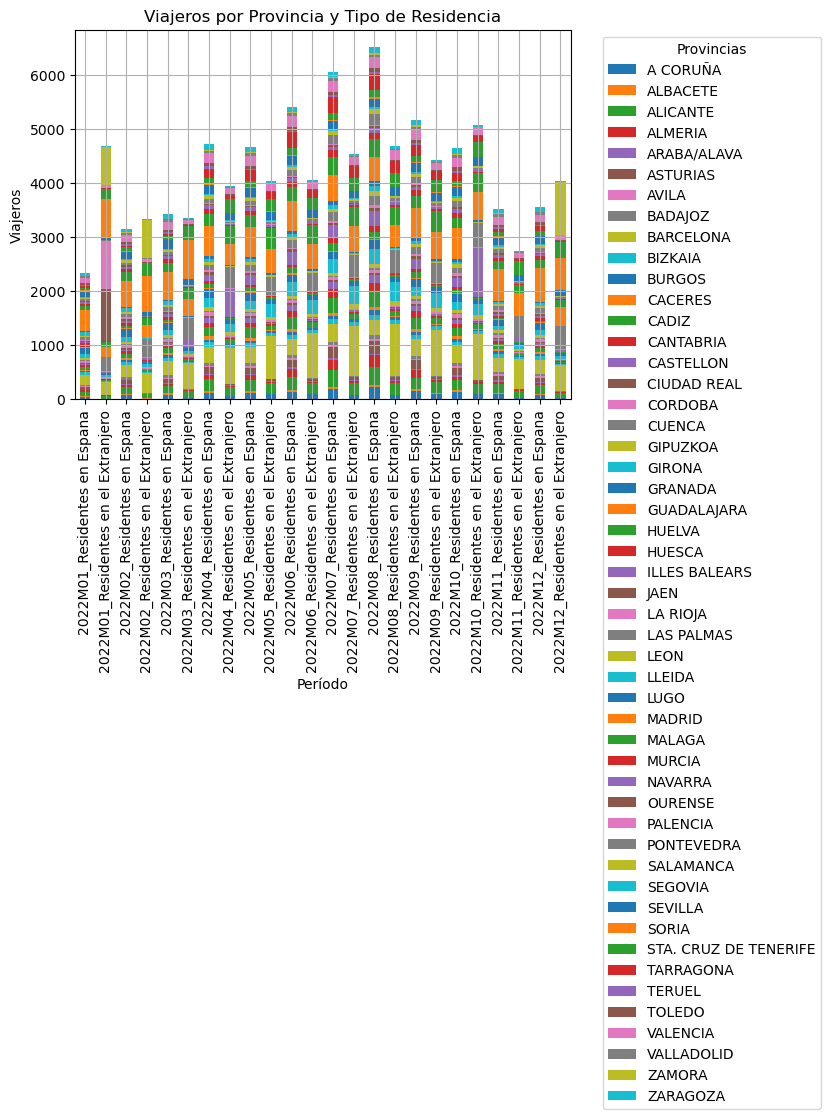

In [44]:
# Transponer el DataFrame para que las provincias estén en el eje x
viajeros = viajeros.apply(pd.to_numeric, errors='coerce')
viajeros_transpuesta = viajeros.transpose()

plt.figure(figsize=(12, 6))
viajeros_transpuesta.plot(kind='bar', stacked=True)
plt.xlabel('Período')
plt.ylabel('Viajeros')
plt.title('Viajeros por Provincia y Tipo de Residencia')
plt.legend(title='Provincias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show();

In [45]:
viajeros.columns

Index(['2022M01_Residentes en Espana', '2022M01_Residentes en el Extranjero',
       '2022M02_Residentes en Espana', '2022M02_Residentes en el Extranjero',
       '2022M03_Residentes en Espana', '2022M03_Residentes en el Extranjero',
       '2022M04_Residentes en Espana', '2022M04_Residentes en el Extranjero',
       '2022M05_Residentes en Espana', '2022M05_Residentes en el Extranjero',
       '2022M06_Residentes en Espana', '2022M06_Residentes en el Extranjero',
       '2022M07_Residentes en Espana', '2022M07_Residentes en el Extranjero',
       '2022M08_Residentes en Espana', '2022M08_Residentes en el Extranjero',
       '2022M09_Residentes en Espana', '2022M09_Residentes en el Extranjero',
       '2022M10_Residentes en Espana', '2022M10_Residentes en el Extranjero',
       '2022M11_Residentes en Espana', '2022M11_Residentes en el Extranjero',
       '2022M12_Residentes en Espana', '2022M12_Residentes en el Extranjero'],
      dtype='object')

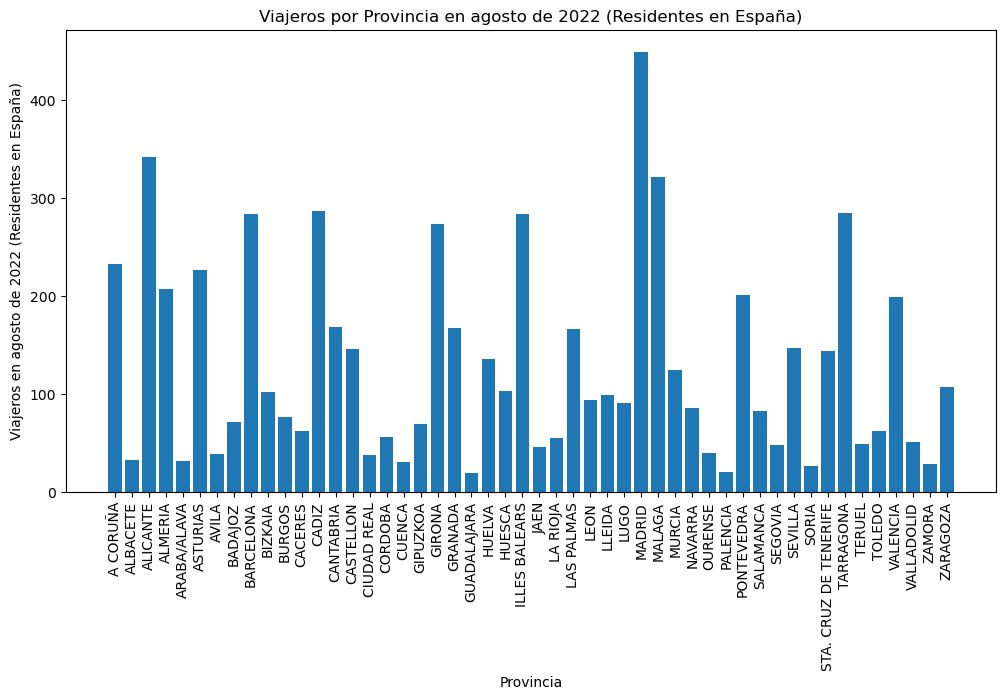

In [47]:
# Paso 1: Filtrar los datos para agosto de 2022 y residentes en España
viajeros_agosto_espana = viajeros['2022M08_Residentes en Espana']

# Paso 2: Calcular la suma de pernoctaciones en cada provincia
viajeros_por_provincia = viajeros_agosto_espana.sum()

# Paso 3: Representar los datos en un gráfico de barras

plt.figure(figsize=(12, 6))
plt.bar(viajeros_agosto_espana.index, viajeros_agosto_espana.values)
plt.xlabel('Provincia')
plt.ylabel('Viajeros en agosto de 2022 (Residentes en España)')
plt.title('Viajeros por Provincia en agosto de 2022 (Residentes en España)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad
plt.show();

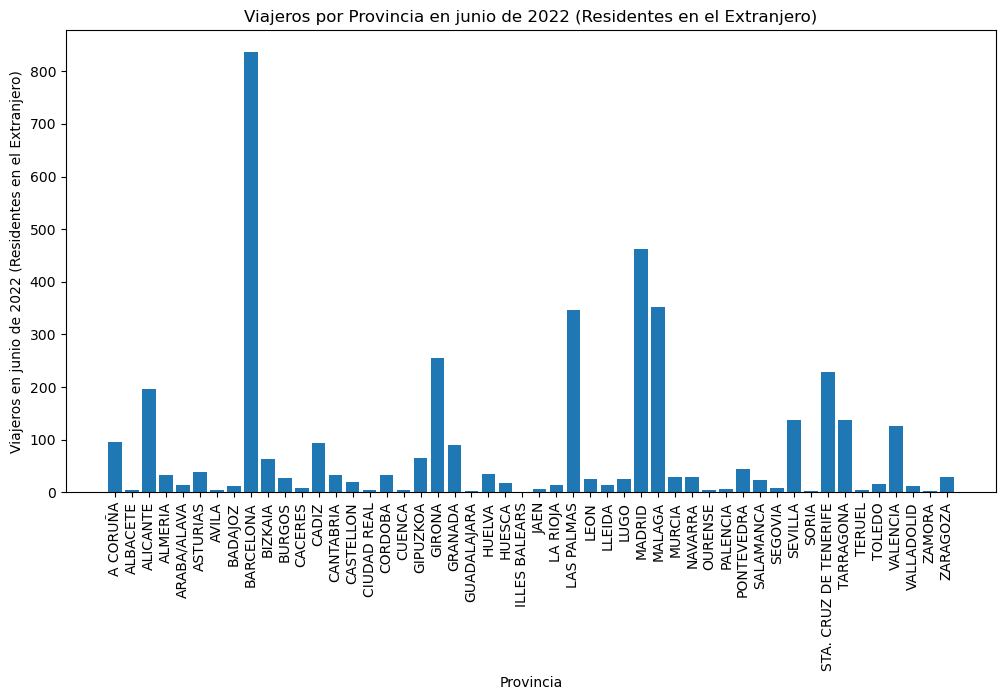

In [50]:
# Paso 1: Filtrar los datos para julio de 2022 y residentes en España
viajeros_junio_extranjero = viajeros['2022M06_Residentes en el Extranjero']

# Paso 2: Calcular la suma de pernoctaciones en cada provincia
viajeros_por_provincia = viajeros_junio_extranjero.sum()

# Paso 3: Representar los datos en un gráfico de barras

plt.figure(figsize=(12, 6))
plt.bar(viajeros_junio_extranjero.index, viajeros_junio_extranjero.values)
plt.xlabel('Provincia')
plt.ylabel('Viajeros en junio de 2022 (Residentes en el Extranjero)')
plt.title('Viajeros por Provincia en junio de 2022 (Residentes en el Extranjero)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

In [25]:
viajeros.to_csv('viajeros.csv')

## PERNOCTACIONES

In [32]:
pernoctaciones= pernoctaciones_df.pivot_table(index= 'Provincias', columns= ('Periodo','Residencia_Nivel_2'), values= 'Total', aggfunc= 'sum')
pernoctaciones

Periodo                                 2022M01                              \
Residencia_Nivel_2        Residentes en EspaÃ±a Residentes en el Extranjero   
Provincias                                                                    
01 Araba/Ãlava                          28.243                       7.540   
02 Albacete                              25.284                       2.980   
03 Alicante/Alacant                     171.987                     198.286   
04 AlmerÃ­a                              40.808                      25.143   
05 Ãvila                                22.053                       2.925   
06 Badajoz                               46.362                       6.030   
07 Balears, Illes                        44.476                      82.953   
08 Barcelona                            354.869                     641.291   
09 Burgos                                41.102                      11.943   
10 CÃ¡ceres                              46.624                       5.717   
11 CÃ¡diz                                89.031                      52.697   
12 CastellÃ³n/CastellÃ³                  35.283                      13.903   
13 Ciudad Real                           30.878                       3.405   
14 CÃ³rdoba                              69.806                      24.437   
15 CoruÃ±a, A                            92.820                      23.102   
16 Cuenca                                25.734                       3.350   
17 Girona                               148.330                      56.573   
18 Granada                              195.488                      81.907   
19 Guadalajara                           18.410                       1.731   
20 Gipuzkoa                              57.328                      36.120   
21 Huelva                                32.910                       4.946   
22 Huesca                               178.048                      11.111   
23 JaÃ©n                                 35.609                       3.289   
24 LeÃ³n                                 46.757                       3.900   
25 Lleida                               160.255                      31.210   
26 Rioja, La                             26.860                       4.205   
27 Lugo                                  26.543                       2.673   
28 Madrid                               699.507                     493.728   
29 MÃ¡laga                              173.183                     314.297   
30 Murcia                                66.903                      24.091   
31 Navarra                               51.910                      14.157   
32 Ourense                               22.295                       2.030   
33 Asturias                              91.380                      12.376   
34 Palencia                              12.163                       1.927   
35 Palmas, Las                          192.951                   2.114.619   
36 Pontevedra                            57.423                      13.407   
37 Salamanca                             50.262                      13.140   
38 Santa Cruz de Tenerife               206.067                   1.339.181   
39 Cantabria                             52.547                      16.746   
40 Segovia                               28.456                      10.369   
41 Sevilla                              189.848                     130.261   
42 Soria                                 16.153                       1.315   
43 Tarragona                             51.700                      17.113   
44 Teruel                                35.177                       4.630   
45 Toledo                                52.678                      11.789   
46 Valencia/ValÃ¨ncia                   167.843                     126.261   
47 Valladolid                            51.787                       6.579   
48 Bizkaia                               71.872   

In [33]:
#Corrijo el indice

pernoctaciones.index =pernoctaciones.index.map(correccion_provincias)

In [34]:
#Primero me aseguro que 'pernoctaciones' tenga el mismo índice antes de ordenarlo:

pernoctaciones.reset_index(inplace=True)
pernoctaciones = pernoctaciones.set_index('Provincias')

#Establezco el índice para ordenarlos por orden alfabético:
pernoctaciones = pernoctaciones.sort_index()
pernoctaciones

Periodo                             2022M01                              \
Residencia_Nivel_2    Residentes en EspaÃ±a Residentes en el Extranjero   
Provincias                                                                
A CORUÑA                             92.820                      23.102   
ALBACETE                             25.284                       2.980   
ALICANTE                            171.987                     198.286   
ALMERIA                              40.808                      25.143   
ARABA/ALAVA                          28.243                       7.540   
ASTURIAS                             91.380                      12.376   
AVILA                                22.053                       2.925   
BADAJOZ                              46.362                       6.030   
BARCELONA                           354.869                     641.291   
BIZKAIA                              71.872                      27.808   
BURGOS                               41.102                      11.943   
CACERES                              46.624                       5.717   
CADIZ                                89.031                      52.697   
CANTABRIA                            52.547                      16.746   
CASTELLON                            35.283                      13.903   
CIUDAD REAL                          30.878                       3.405   
CORDOBA                              69.806                      24.437   
CUENCA                               25.734                       3.350   
GIPUZKOA                             57.328                      36.120   
GIRONA                              148.330                      56.573   
GRANADA                             195.488                      81.907   
GUADALAJARA                          18.410                       1.731   
HUELVA                               32.910                       4.946   
HUESCA                              178.048                      11.111   
ILLES BALEARS                        44.476                      82.953   
JAEN                                 35.609                       3.289   
LA RIOJA                             26.860                       4.205   
LAS PALMAS                          192.951                   2.114.619   
LEON                                 46.757                       3.900   
LLEIDA                              160.255                      31.210   
LUGO                                 26.543                       2.673   
MADRID                              699.507                     493.728   
MALAGA                              173.183                     314.297   
MURCIA                               66.903                      24.091   
NAVARRA                              51.910                      14.157   
OURENSE                              22.295                       2.030   
PALENCIA                             12.163                       1.927   
PONTEVEDRA                           57.423                      13.407   
SALAMANCA                            50.262                      13.140   
SEGOVIA                              28.456                      10.369   
SEVILLA                             189.848                     130.261   
SORIA                                16.153                       1.315   
STA. CRUZ DE TENERIFE               206.067                   1.339.181   
TARRAGONA                            51.700                      17.113   
TERUEL                               35.177                       4.630   
TOLEDO                               52.678                      11.789   
VALENCIA                            167.843                     126.261   
VALLADOLID                           51.787                       6.579   
ZAMORA                               11.183                         909   
ZARAGOZA                             81.558                      21.506   

Periodo                 

In [35]:
pernoctaciones.columns = pernoctaciones.columns.set_levels(pernoctaciones.columns.levels[1].str.replace('Residentes en EspaÃ±a', 'Residentes en Espana'), level=1)

In [38]:
pernoctaciones.columns = [e[0]+'_'+e[1] for e in pernoctaciones.columns]

In [39]:
pernoctaciones

,2022M01_Residentes en Espana,2022M01_Residentes en el Extranjero,2022M02_Residentes en Espana,2022M02_Residentes en el Extranjero,2022M03_Residentes en Espana,2022M03_Residentes en el Extranjero,2022M04_Residentes en Espana,2022M04_Residentes en el Extranjero,2022M05_Residentes en Espana,2022M05_Residentes en el Extranjero,...,2022M08_Residentes en Espana,2022M08_Residentes en el Extranjero,2022M09_Residentes en Espana,2022M09_Residentes en el Extranjero,2022M10_Residentes en Espana,2022M10_Residentes en el Extranjero,2022M11_Residentes en Espana,2022M11_Residentes en el Extranjero,2022M12_Residentes en Espana,2022M12_Residentes en el Extranjero
Provincias,,,,,,,,,,,,,,,,,,,,,
A CORUÑA,92.820,23.102,128.622,25.137,153.507,46.227,213.752,93.380,209.105,153.514,...,495.128,140.575,275.605,168.581,229.986,155.406,173.188,58.357,144.998,41.098
ALBACETE,25.284,2.980,32.498,7.891,43.453,5.416,60.866,6.047,61.782,7.086,...,73.671,7.257,70.643,8.632,66.819,7.566,52.608,12.094,38.813,6.397
ALICANTE,171.987,198.286,287.162,308.248,419.223,532.215,698.398,687.663,652.351,844.278,...,1.292.954,1.045.358,726.002,954.588,629.533,850.878,560.122,581.167,490.876,428.586
ALMERIA,40.808,25.143,69.288,34.320,124.044,44.210,205.526,59.012,261.272,110.734,...,827.319,203.902,485.307,171.135,166.322,130.192,83.630,46.391,75.710,31.548
ARABA/ALAVA,28.243,7.540,35.958,8.782,45.593,12.828,50.651,15.935,48.807,21.770,...,70.075,31.222,51.216,26.209,55.261,21.870,46.690,13.508,46.784,10.819
ASTURIAS,91.380,12.376,116.352,15.359,138.106,22.111,241.887,43.278,217.564,66.128,...,576.911,96.481,345.282,83.184,273.286,56.434,160.837,24.575,148.630,22.697
AVILA,22.053,2.925,27.145,4.478,29.742,4.779,45.550,7.399,42.224,9.637,...,64.079,8.537,46.948,9.325,47.480,9.479,35.003,4.792,33.594,4.744
BADAJOZ,46.362,6.030,68.167,8.065,83.615,9.972,111.977,15.424,99.053,12.885,...,120.485,24.171,107.018,17.712,108.674,15.046,79.728,10.457,64.901,9.654
BARCELONA,354.869,641.291,419.550,975.350,516.812,1.372.491,605.783,1.927.190,614.237,2.303.551,...,692.499,3.182.414,596.473,2.482.226,607.951,2.314.570,508.819,1.484.186,498.284,1.262.761


<Figure size 1200x600 with 0 Axes>

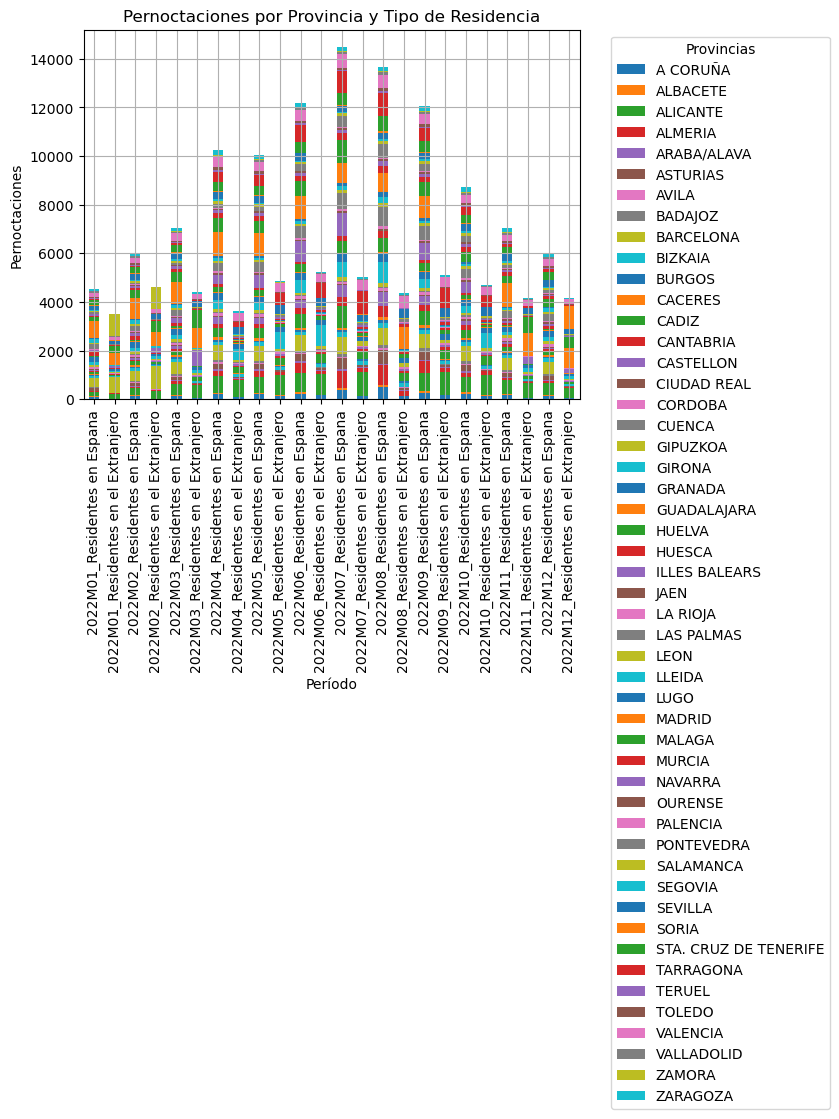

In [51]:
# Transponer el DataFrame para que las provincias estén en el eje x
pernoctaciones = pernoctaciones.apply(pd.to_numeric, errors='coerce')
pernoctaciones_transpuesta = pernoctaciones.transpose()

plt.figure(figsize=(12, 6))
pernoctaciones_transpuesta.plot(kind='bar', stacked=True)
plt.xlabel('Período')
plt.ylabel('Pernoctaciones')
plt.title('Pernoctaciones por Provincia y Tipo de Residencia')
plt.legend(title='Provincias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show();


Al analizar la gráfica de pernoctaciones en España, es evidente que el mes de julio de 2022 (representado por "2022M07") destaca claramente como el mes con el mayor número de pernoctaciones por parte de los residentes en España. Este pico en julio podría atribuirse a la temporada de vacaciones de verano, cuando muchas personas viajan y se hospedan en diversas provincias de España.

Sin embargo, lo que llama aún más la atención es que el mes de junio (representado por "2022M06") sobresale en términos de pernoctaciones por parte de los residentes en el extranjero. 

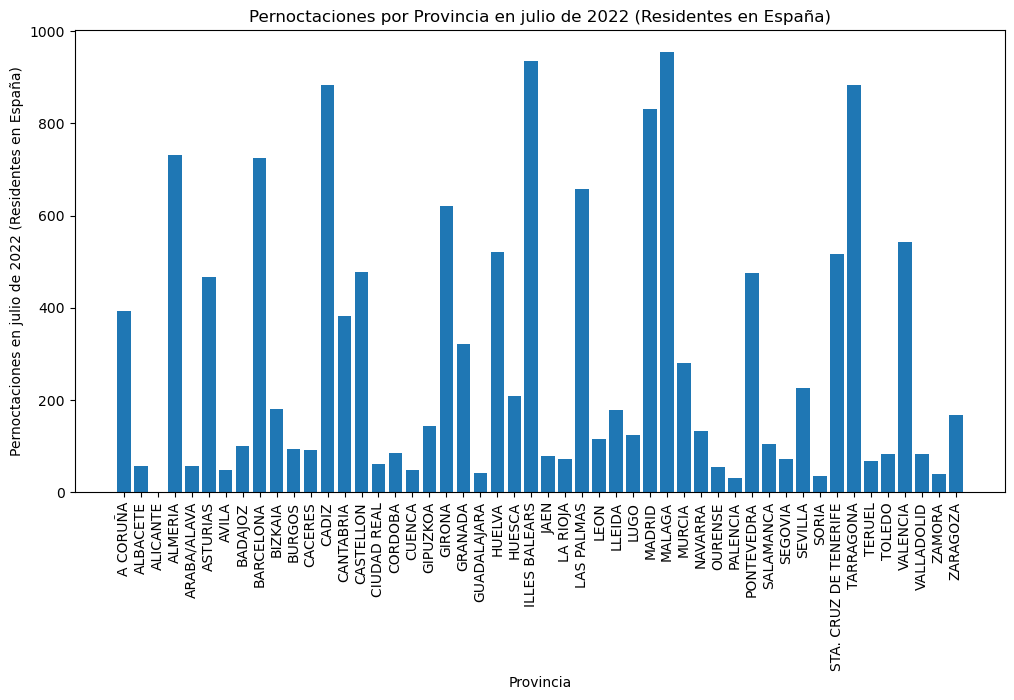

In [53]:
# Paso 1: Filtrar los datos para julio de 2022 y residentes en España
pernoctaciones_julio_espana = pernoctaciones['2022M07_Residentes en Espana']

# Paso 2: Calcular la suma de pernoctaciones en cada provincia
pernoctaciones_por_provincia = pernoctaciones_julio_espana.sum()

# Paso 3: Representar los datos en un gráfico de barras

plt.figure(figsize=(12, 6))
plt.bar(pernoctaciones_julio_espana.index, pernoctaciones_julio_espana.values)
plt.xlabel('Provincia')
plt.ylabel('Pernoctaciones en julio de 2022 (Residentes en España)')
plt.title('Pernoctaciones por Provincia en julio de 2022 (Residentes en España)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad
plt.show();

Durante el mes de julio de 2022, Málaga se destacó como el destino preferido por los residentes en España, probablemente debido a su oferta turística variada, hermosas playas y clima atractivo en esa temporada. Las Islas Baleares, con destinos como Mallorca e Ibiza, también atrajeron a residentes locales en busca de vacaciones emocionantes sin salir del país.

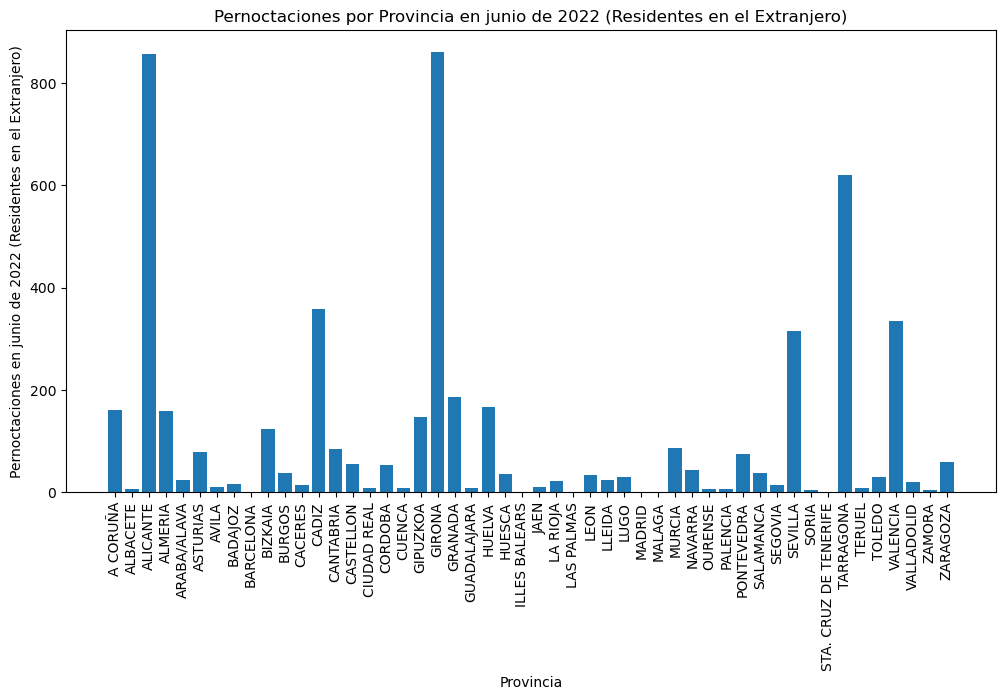

In [55]:
# Paso 1: Filtrar los datos para junio de 2022 y residentes en España
pernoctaciones_junio_extranjero = pernoctaciones['2022M06_Residentes en el Extranjero']

# Paso 2: Calcular la suma de pernoctaciones en cada provincia
pernoctaciones_por_provincia = pernoctaciones_junio_extranjero.sum()

# Paso 3: Representar los datos en un gráfico de barras

plt.figure(figsize=(12, 6))
plt.bar(pernoctaciones_junio_extranjero.index, pernoctaciones_junio_extranjero.values)
plt.xlabel('Provincia')
plt.ylabel('Pernoctaciones en junio de 2022 (Residentes en el Extranjero)')
plt.title('Pernoctaciones por Provincia en junio de 2022 (Residentes en el Extranjero)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

Por otro lado, para los residentes en el extranjero, Alicante y Girona fueron los destinos más populares. Alicante, en la costa este, y Girona, en Cataluña, ofrecen experiencias únicas, desde playas soleadas hasta rica cultura catalana, lo que los convierte en opciones atractivas para aquellos que visitan España desde el extranjero. Estas preferencias pueden deberse a conexiones de vuelos, recomendaciones personales y gustos individuales.

In [40]:
pernoctaciones.to_csv('pernoctaciones.csv')

## Exportación a Mongo

In [ ]:
#%pip install pymongo

In [26]:
from pymongo import MongoClient

In [27]:
# Conecto a la base de datos Mongo
client = MongoClient('localhost', 27017)

In [28]:
db = client['turismo']

In [29]:
viajeros_data = pd.read_csv('export/viajeros.csv') 

In [30]:
viajeros_list = viajeros_data.to_dict(orient='records')

In [31]:
viajeros_collection = db['viajeros']
viajeros_collection.insert_many(viajeros_list)

InsertManyResult([ObjectId('6548f59c54b49c38cc2b97fb'), ObjectId('6548f59c54b49c38cc2b97fc'), ObjectId('6548f59c54b49c38cc2b97fd'), ObjectId('6548f59c54b49c38cc2b97fe'), ObjectId('6548f59c54b49c38cc2b97ff'), ObjectId('6548f59c54b49c38cc2b9800'), ObjectId('6548f59c54b49c38cc2b9801'), ObjectId('6548f59c54b49c38cc2b9802'), ObjectId('6548f59c54b49c38cc2b9803'), ObjectId('6548f59c54b49c38cc2b9804'), ObjectId('6548f59c54b49c38cc2b9805'), ObjectId('6548f59c54b49c38cc2b9806'), ObjectId('6548f59c54b49c38cc2b9807'), ObjectId('6548f59c54b49c38cc2b9808'), ObjectId('6548f59c54b49c38cc2b9809'), ObjectId('6548f59c54b49c38cc2b980a'), ObjectId('6548f59c54b49c38cc2b980b'), ObjectId('6548f59c54b49c38cc2b980c'), ObjectId('6548f59c54b49c38cc2b980d'), ObjectId('6548f59c54b49c38cc2b980e'), ObjectId('6548f59c54b49c38cc2b980f'), ObjectId('6548f59c54b49c38cc2b9810'), ObjectId('6548f59c54b49c38cc2b9811'), ObjectId('6548f59c54b49c38cc2b9812'), ObjectId('6548f59c54b49c38cc2b9813'), ObjectId('6548f59c54b49c38cc2b98

In [41]:
pernoctaciones_data = pd.read_csv('export/pernoctaciones.csv')
pernoctaciones_list = pernoctaciones_data.to_dict(orient='records')
pernoctaciones_collection = db['pernoctaciones']
pernoctaciones_collection.insert_many(pernoctaciones_list)

InsertManyResult([ObjectId('6548f76854b49c38cc2b982d'), ObjectId('6548f76854b49c38cc2b982e'), ObjectId('6548f76854b49c38cc2b982f'), ObjectId('6548f76854b49c38cc2b9830'), ObjectId('6548f76854b49c38cc2b9831'), ObjectId('6548f76854b49c38cc2b9832'), ObjectId('6548f76854b49c38cc2b9833'), ObjectId('6548f76854b49c38cc2b9834'), ObjectId('6548f76854b49c38cc2b9835'), ObjectId('6548f76854b49c38cc2b9836'), ObjectId('6548f76854b49c38cc2b9837'), ObjectId('6548f76854b49c38cc2b9838'), ObjectId('6548f76854b49c38cc2b9839'), ObjectId('6548f76854b49c38cc2b983a'), ObjectId('6548f76854b49c38cc2b983b'), ObjectId('6548f76854b49c38cc2b983c'), ObjectId('6548f76854b49c38cc2b983d'), ObjectId('6548f76854b49c38cc2b983e'), ObjectId('6548f76854b49c38cc2b983f'), ObjectId('6548f76854b49c38cc2b9840'), ObjectId('6548f76854b49c38cc2b9841'), ObjectId('6548f76854b49c38cc2b9842'), ObjectId('6548f76854b49c38cc2b9843'), ObjectId('6548f76854b49c38cc2b9844'), ObjectId('6548f76854b49c38cc2b9845'), ObjectId('6548f76854b49c38cc2b98